In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

In [2]:
pip install ISLP

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.1/823.1 kB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 107.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.1 MB/s eta 0:00:00
 

In [3]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
summarize,
poly)

In [4]:
auto = load_data('Auto')
auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

In [75]:
auto[0:3]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1


In [17]:
y = auto['mpg']
design = MS(['horsepower'])
X = design.fit_transform(auto)
X[:4]

,intercept,horsepower
name,,
chevrolet chevelle malibu,1.0,130
buick skylark 320,1.0,165
plymouth satellite,1.0,150
amc rebel sst,1.0,150


In [18]:
summarize(results)

,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
HP,-0.1578,0.006,-24.489,0.0


## i. Is there a relationship between horsepower and mpg?
Yes. The p-value for the horsepower coefficient is essentially 0, which provides very strong evidence that horsepower is related to mpg.

In [19]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Fri, 30 May 2025   Prob (F-statistic):           7.03e-81
Time:                        23:25:02   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.9359      0.717     55.660      0.000      38.525      41.347
HP            -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## ii. How strong is the relationship?
The R-squared value is 0.606, meaning that approximately 60.6% of the variability in mpg can be explained by horsepower alone. This suggests a moderately strong relationship.

## iii. Is the relationship positive or negative?
Negative.
The coefficient for horsepower is −0.1578, which means that as horsepower increases, mpg decreases. Each additional unit of horsepower is associated with an average decrease of 0.1578 mpg. you can also see it on a plot below

## iv. What is the predicted mpg for a horsepower of 98?
You can do it by hand or run the cell below to see that MPG(98) = 24.47

In [22]:
new_df = pd.DataFrame({'horsepower':[98]})
newX = design.transform(new_df)
new_predictions = results.get_prediction(newX);
new_predictions.predicted_mean

array([24.46707715])

In [23]:
#confidence intervals
new_predictions.conf_int(alpha=0.05)

array([[23.97307896, 24.96107534]])

In [24]:
# prediction interals
new_predictions.conf_int(obs=True, alpha=0.05)

array([[14.80939607, 34.12475823]])

## (b)
Plot the response and the predictor in a new set of axes ax. Use
the ax.axline() method or the abline() function defined in the
lab to display the least squares regression line.

<ipython-input-40-15ffff1dee18>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.axline((0, results.params[0]), slope=results.params[1], color='r', linestyle='--', linewidth=3);


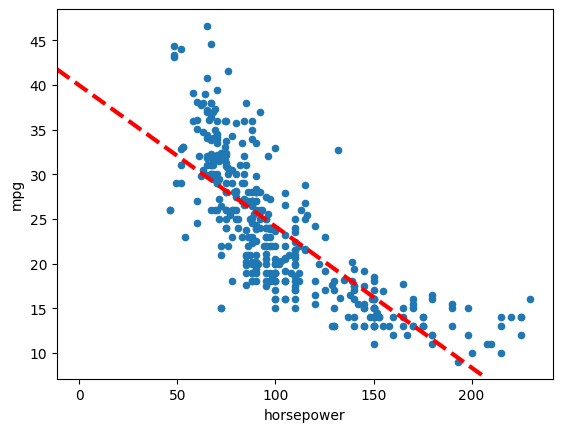

In [40]:
ax = auto.plot.scatter('horsepower', 'mpg')
ax.axline((0, results.params[0]), slope=results.params[1], color='r', linestyle='--', linewidth=3);

## (c)
(c) Produce some diagnostic plots of the least squares regression
ft as described in the lab. Comment on any problems you see
with the ft.

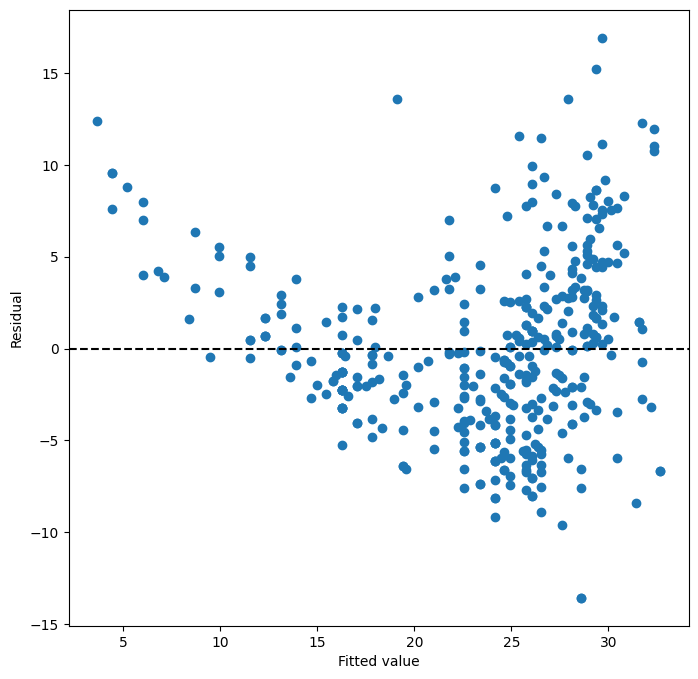

In [41]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues , results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

### Issues with the Plot:
1. Non-linearity:
- There is a clear U-shaped pattern in the residuals.
- This suggests that the relationship between horsepower and mpg is not strictly linear.
- A straight-line model is underestimating mpg at low and high horsepower and overestimating it in the middle range.

2. Heteroscedasticity (Non-constant variance):
- The spread of residuals increases as fitted values increase.
- This violates the constant variance assumption of linear regression.
- It suggests that the model performs worse for higher predicted mpg values.

### Possible Outliers:

There are a few residuals exceeding ±10 or more, which may be outliers or influential points. We will explore further below.

### Recommendations:
- fit a polynomial regression (e.g., add a horsepower^2 term).
- Check for influential observations using a Residuals vs. Leverage plot. (done below)

np.int64(115)

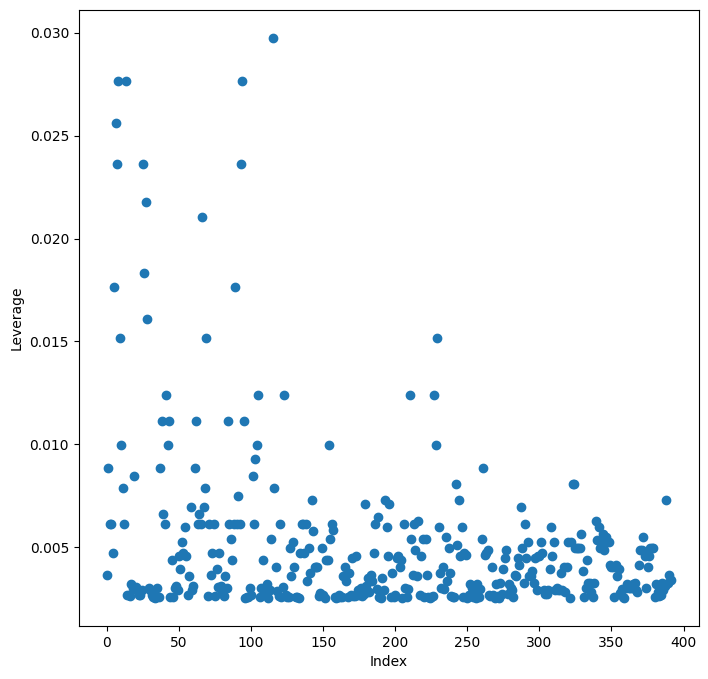

In [42]:
infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

### What the plot shows
- Most points have low leverage, clustered below 0.01.

- A few points (top-left) have noticeably higher leverage, around 0.025–0.03.

- No single point crosses an extreme threshold, but the plot does suggest some observations are much farther from the mean of horsepower than others.

### Any problems?
- Yes, some points have relatively high leverage, but this is not necessarily a problem unless they also have large residuals.

- To diagnose true influential points, I plotted residuals vs leverage

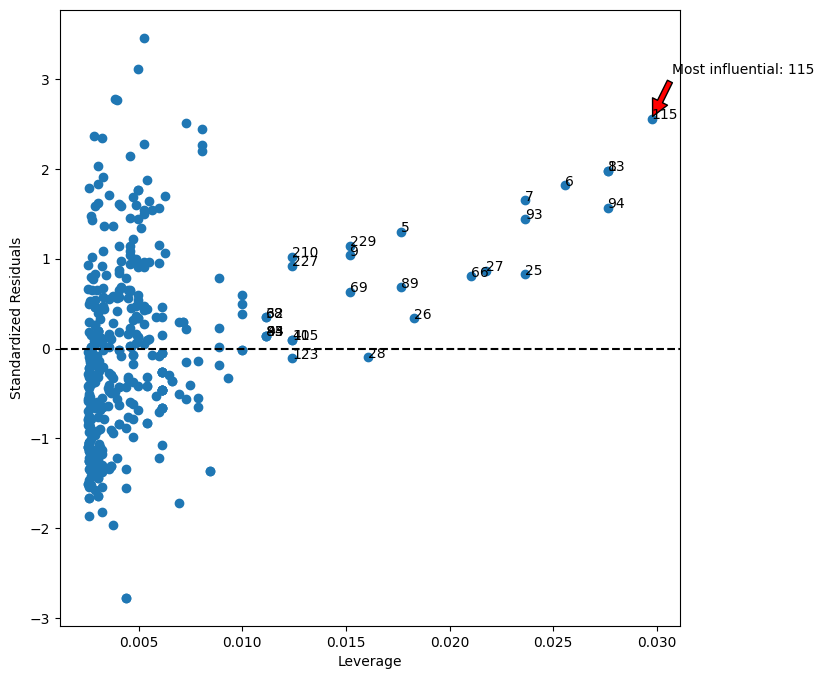

In [45]:
# Get influence measures from the fitted model
infl = results.get_influence()

# Extract standardized residuals and leverage
leverage = infl.hat_matrix_diag
standardized_residuals = infl.resid_studentized_internal

# Create plot
ax = subplots(figsize=(8, 8))[1]
ax.scatter(leverage, standardized_residuals)
ax.set_xlabel('Leverage')
ax.set_ylabel('Standardized Residuals')
ax.axhline(0, color='k', linestyle='--')

# Optionally, label the most influential point
influential_index = np.argmax(leverage)
ax.annotate(f'Most influential: {influential_index}',
            xy=(leverage[influential_index], standardized_residuals[influential_index]),
            xytext=(leverage[influential_index]+0.001, standardized_residuals[influential_index]+0.5),
            arrowprops=dict(facecolor='red', shrink=0.05))

# Highlight high-leverage points visually (optional)
high_leverage_threshold = 2 * (X.shape[1] / X.shape[0])  # heuristic threshold
for i in range(len(leverage)):
    if leverage[i] > high_leverage_threshold:
        ax.annotate(str(i), (leverage[i], standardized_residuals[i]))


In [74]:
# Now print the most influential car and top 10 most influential cars by leverage
top_10_indices = np.argsort(leverage)[-10:][::-1]  # top 10 leverage indices descending

print("Most Influential Car:")
print( auto.index.tolist()[influential_index])
# Use .iloc for positional indexing
print(f"MPG: {auto.iloc[influential_index, auto.columns.get_loc('mpg')]}")
# Corrected df.loc to auto.loc and using .iloc for positional indexing
print(f"Horsepower: {auto.iloc[influential_index, auto.columns.get_loc('horsepower')]}")
print(f"Leverage: {leverage[influential_index]}")
print(f"Standardized Residual: {standardized_residuals[influential_index]}\n")

print("Top 10 Most Influential Cars by Leverage:")
print("{:<6} {:<10} {:<12} {:<10} {:<22}".format("Index", "MPG", "Horsepower", "Leverage", "Standardized Residual"))
for idx in top_10_indices:
    name = auto.index.tolist()[idx]
    mpg = auto.iloc[idx, auto.columns.get_loc('mpg')]
    horsepower = auto.iloc[idx, auto.columns.get_loc('horsepower')]
    lev = leverage[idx]
    std_resid = standardized_residuals[idx]
    print(f"{name:<15} {mpg:<10} {horsepower:<12} {lev:<10.4f} {std_resid:<22.4f}")

Most Influential Car:
pontiac grand prix
MPG: 16.0
Horsepower: 230
Leverage: 0.029753001790921437
Standardized Residual: 2.559571784082948

Top 10 Most Influential Cars by Leverage:
Index  MPG        Horsepower   Leverage   Standardized Residual 
pontiac grand prix 16.0       230          0.0298     2.5596                
pontiac catalina 14.0       225          0.0276     1.9802                
buick electra 225 custom 12.0       225          0.0276     1.5668                
buick estate wagon (sw) 14.0       225          0.0276     1.9802                
chevrolet impala 14.0       220          0.0256     1.8151                
ford f250       10.0       215          0.0236     0.8253                
plymouth fury iii 14.0       215          0.0236     1.6505                
chrysler new yorker brougham 13.0       215          0.0236     1.4442                
dodge d200      11.0       210          0.0218     0.8680                
mercury marquis 11.0       208          0.0211    

## Summary
Clearly the realationship is not linear. Low and large values are not captured by the linear model. we can either limit the min and max of our linear model or fit a polynomial.